In [1]:
metafile="J1646-2142_550MHz_coherent16.meta"

In [2]:
import ppalign as ppa
import numpy as np

In [3]:
outfile = "abc.port"
ppa.align_archives(metafile=metafile, initial_guess="550_coherent_GWB/J1646-2142_550_200_1024_2.10jun2k20.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM",
                   tscrunch=True, pscrunch=True, SNR_cutoff=0.0, outfile=outfile, niter=3, quiet=False)

# Initial guess is an initial guess for an average portrait. I used the highest SNR profile for this.
# In this case, J1646-2142f64avgport.port is the average portrait created from the data files listed in the
# metafile. "f64" denotes that the files have been scrunched to have 64 frequency channels

# It is important to note that bad channels zeroed in the GMRT data processing pipeline must be fully zapped
# before being run through this notebook. I created a very simple shell script to do this and f scrunch to 
# a given number of frequency channels. I have only had total functionality with 64 channels. Input files also
# must be in FITS format. The shell script requires PSRCHIVE tools to work.




Initial guess: 550_coherent_GWB/J1646-2142_550_200_1024_2.10jun2k20.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM.

Reading data from 550_coherent_GWB/J1646-2142_550_200_1024_2.10jun2k20.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.725938
        center freq. [MHz] = 649.9021
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 16
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity

Doing iteration 1...
FITS file name: 550_coherent_GWB/J1646-2142_550_200_1024_2.29jan2k20.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM.

Reading data from 550_coherent_GWB/J1646-2142_550_200_1024_2.29jan2k20.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.725938
        center freq. [MHz] = 649.9021
        ba

In [4]:
import ppspline as pps
avgport = outfile
dp = pps.DataPortrait(avgport)
dp.normalize_portrait("prof")

# This initializes the portrait be modeled by the spline model later. It is normalized 
# by the average portrait created earlier, so as to clearly model any frequency-dependent
# profile evolution.



Reading data from abc.port on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 0.000000
        center freq. [MHz] = 649.9021
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 16
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity



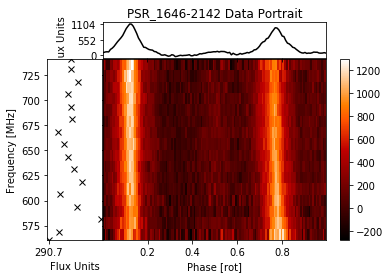

In [6]:
dp.show_data_portrait()

In [7]:
# Mainly set to defaults. SNR cutoffs removed
smooth = True
rchi2_tol = 0.1 #What is this factor
k = 5
sfac = 1.0
max_nbreak = 2

# Setting default arguments for the make_spline_model() seen below. It is important to set
# max_nbreak = None. Otherwise, the spline model will have many breakpoints and not accurately
# model the profile evolution.
dp.make_spline_model(smooth=smooth, rchi2_tol=rchi2_tol, k=k, sfac=sfac,
                    max_nbreak=max_nbreak, model_name=None, quiet=False, snr_cutoff=15.0)
# Creation of spline model. snr_cutoff is default to 150 but tweaking may be needed to
# get 1 - 2 "significant" eigenprofiles. Somewhat arbitrary.


Performing principal component analysis on data with 128 dimensions and 16 measurements...
B-spline interpolation model abc.port.spl uses 1 basis profile components and 2 breakpoints (6 B-splines with k=5).


/home/jroy/anaconda2/lib/python2.7/site-packages/scipy/interpolate/_fitpack_impl.py:296: RuntimeWarning: The spline is weighted least-squares polynomial of degree k.
fp gives the upper bound fp0 for the smoothing factor s	k=5 n=12 m=16 fp=126.970176 s=3134.341377
  (k, len(t), m, fp, s)))


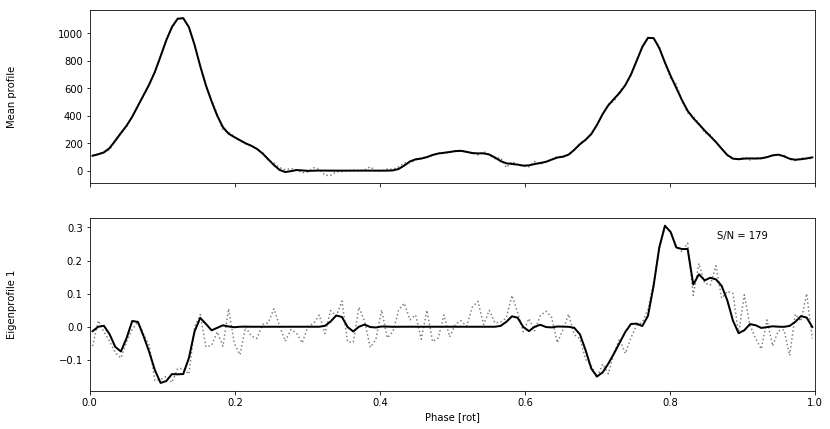

In [8]:
dp.show_eigenprofiles(show_snrs=True)
# Showing average profile and eigenprofile(s)


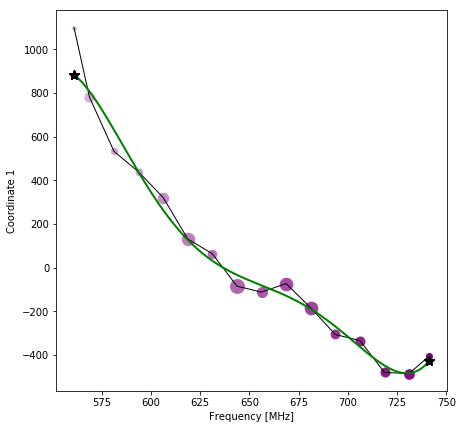

In [9]:
dp.show_spline_curve_projections()
# Shows a projection of how the eigenprofile(s) changes according to frequency and to each other.


In [10]:
J1646_fit_modelfile = "J1646-2142_550MHz_splinefit.spl"
dp.write_model(J1646_fit_modelfile, quiet=False)

# Writes spline model to a file.


Wrote modelfile J1646-2142_550MHz_splinefit.spl.



Reading data from 550_coherent_GWB/J1646-2142_550_200_1024_2.29jan2k20.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.725938
        center freq. [MHz] = 649.9021
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 16
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 3597.93 s
Reading model from J1646-2142_550MHz_splinefit.spl...
Fitting for TOA #1
--------------------------
550_coherent_GWB/J1646-2142_550_200_1024_2.29jan2k20.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM
~0.0190 sec/TOA
Med. TOA error is 6.907 us

Reading data from 550_coherent_GWB/J1646-2142_550_200_1024_2.29jan2k20.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.725938
        cent

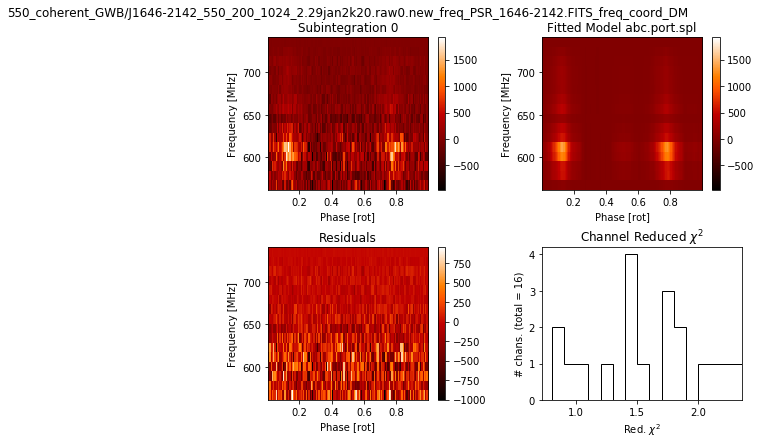


Reading data from 550_coherent_GWB/J1646-2142_550_200_1024_2.10jun2k20.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.725938
        center freq. [MHz] = 649.9021
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 16
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 2698.44 s
Reading model from J1646-2142_550MHz_splinefit.spl...
Fitting for TOA #1
--------------------------
550_coherent_GWB/J1646-2142_550_200_1024_2.10jun2k20.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM
~0.0186 sec/TOA
Med. TOA error is 2.003 us

Reading data from 550_coherent_GWB/J1646-2142_550_200_1024_2.10jun2k20.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.725938
        cent

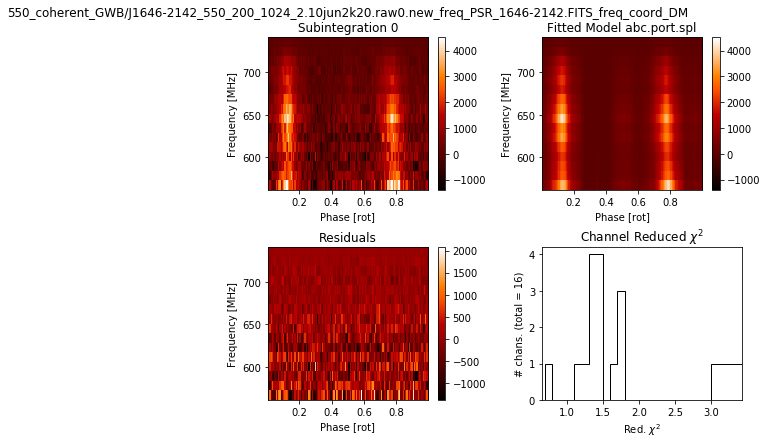


Reading data from 550_coherent_GWB/J1646-2142_550_200_512_2.18jun2k20.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.725938
        center freq. [MHz] = 649.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 16
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 2699.92 s
Reading model from J1646-2142_550MHz_splinefit.spl...
Fitting for TOA #1
--------------------------
550_coherent_GWB/J1646-2142_550_200_512_2.18jun2k20.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM
~0.0109 sec/TOA
Med. TOA error is 6.353 us

Reading data from 550_coherent_GWB/J1646-2142_550_200_512_2.18jun2k20.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.725938
        center 

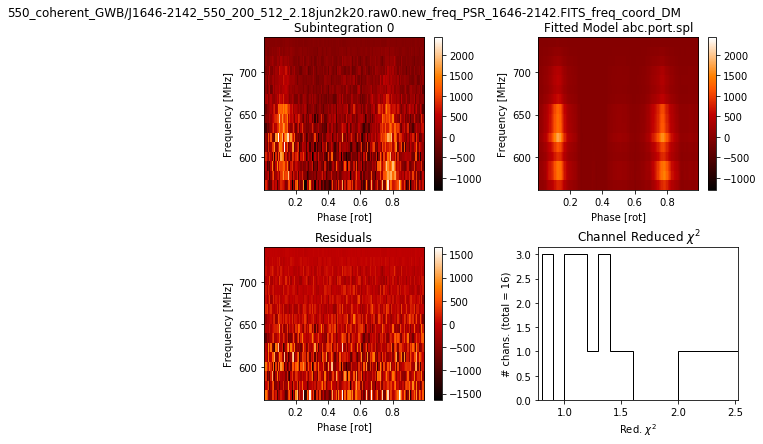


Reading data from 550_coherent_GWB/J1646-2142_550_200_512_2.9jul2k20.raw0.new_freq.128_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.725938
        center freq. [MHz] = 649.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 16
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 2699.92 s
Reading model from J1646-2142_550MHz_splinefit.spl...
Fitting for TOA #1
--------------------------
550_coherent_GWB/J1646-2142_550_200_512_2.9jul2k20.raw0.new_freq.128_PSR_1646-2142.FITS_freq_coord_DM
~0.0087 sec/TOA
Med. TOA error is 3.914 us

Reading data from 550_coherent_GWB/J1646-2142_550_200_512_2.9jul2k20.raw0.new_freq.128_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.725938
      

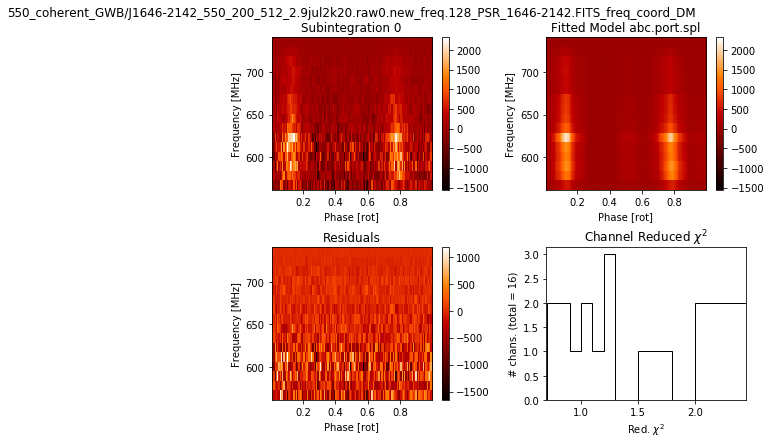


Reading data from 550_coherent_GWB/J1646-2142_550_200_512_2.29jul2k20.raw0.new_freq.128_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.854
        DM [cm**-3 pc]     = 29.725938
        center freq. [MHz] = 649.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 16
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 1442.12 s
Reading model from J1646-2142_550MHz_splinefit.spl...
Fitting for TOA #1
--------------------------
550_coherent_GWB/J1646-2142_550_200_512_2.29jul2k20.raw0.new_freq.128_PSR_1646-2142.FITS_freq_coord_DM
~0.0112 sec/TOA
Med. TOA error is 2.909 us

Reading data from 550_coherent_GWB/J1646-2142_550_200_512_2.29jul2k20.raw0.new_freq.128_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.854
        DM [cm**-3 pc]     = 29.725938
   

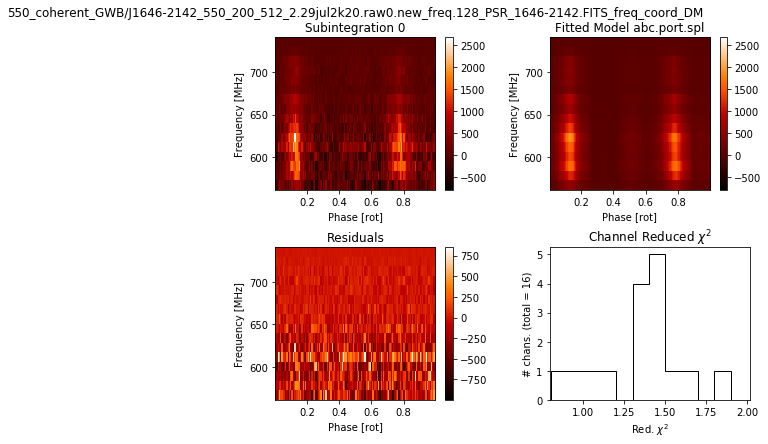


Reading data from 550_coherent_GWB/J1646-2142_550_200_512_2.8aug2k20.raw0.new_freq.128_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.854
        DM [cm**-3 pc]     = 29.725938
        center freq. [MHz] = 649.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 16
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 2699.92 s
Reading model from J1646-2142_550MHz_splinefit.spl...
Fitting for TOA #1
--------------------------
550_coherent_GWB/J1646-2142_550_200_512_2.8aug2k20.raw0.new_freq.128_PSR_1646-2142.FITS_freq_coord_DM
~0.0143 sec/TOA
Med. TOA error is 4.251 us

Reading data from 550_coherent_GWB/J1646-2142_550_200_512_2.8aug2k20.raw0.new_freq.128_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.854
        DM [cm**-3 pc]     = 29.725938
      

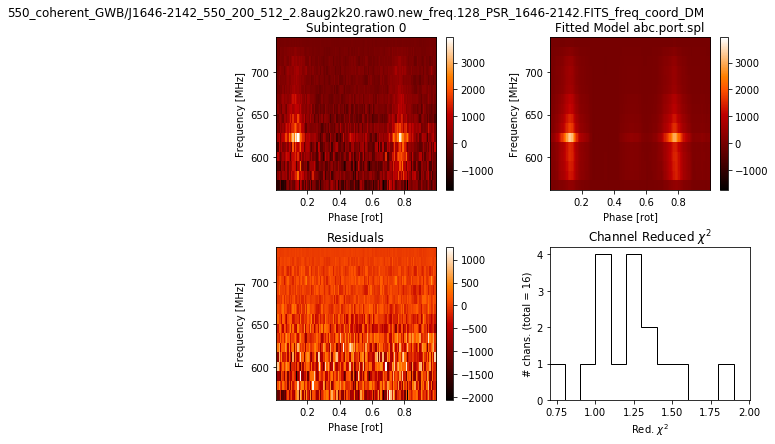


Reading data from 550_coherent_GWB/J1646-2142_550_200_512_2.11sep2k20.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.854
        DM [cm**-3 pc]     = 29.725938
        center freq. [MHz] = 649.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 16
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 2161.70 s
Reading model from J1646-2142_550MHz_splinefit.spl...
Fitting for TOA #1
--------------------------
550_coherent_GWB/J1646-2142_550_200_512_2.11sep2k20.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM
~0.0085 sec/TOA
Med. TOA error is 3.239 us

Reading data from 550_coherent_GWB/J1646-2142_550_200_512_2.11sep2k20.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.854
        DM [cm**-3 pc]     = 29.725938
        center 

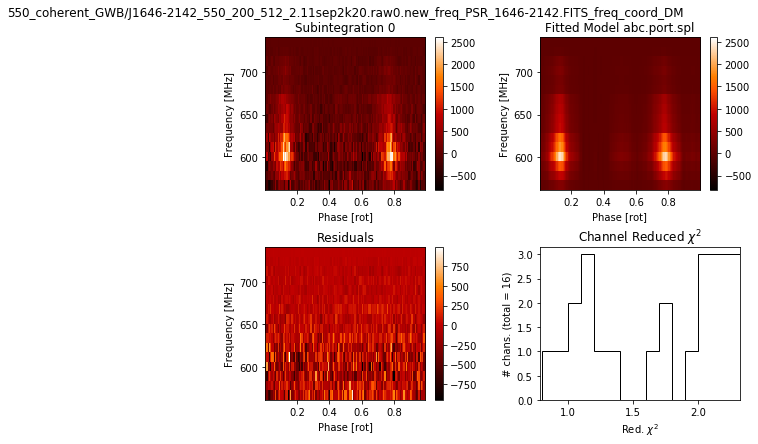


Reading data from 550_coherent_GWB/J1646-2142_550_200_512_2.7nov2k20.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.725938
        center freq. [MHz] = 649.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 16
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 4199.55 s
Reading model from J1646-2142_550MHz_splinefit.spl...
Fitting for TOA #1
--------------------------
550_coherent_GWB/J1646-2142_550_200_512_2.7nov2k20.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM
~0.0123 sec/TOA
Med. TOA error is 5.900 us

Reading data from 550_coherent_GWB/J1646-2142_550_200_512_2.7nov2k20.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.725938
        center fre

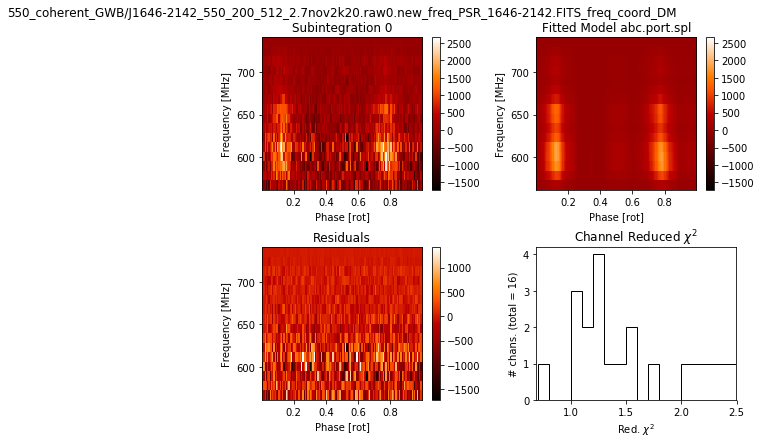


Reading data from 550_coherent_GWB/J1646-2142_550_200_512_2.12dec2k20.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.725938
        center freq. [MHz] = 649.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 16
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 2699.92 s
Reading model from J1646-2142_550MHz_splinefit.spl...
Fitting for TOA #1
--------------------------
550_coherent_GWB/J1646-2142_550_200_512_2.12dec2k20.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM
~0.0187 sec/TOA
Med. TOA error is 4.441 us

Reading data from 550_coherent_GWB/J1646-2142_550_200_512_2.12dec2k20.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.725938
        center 

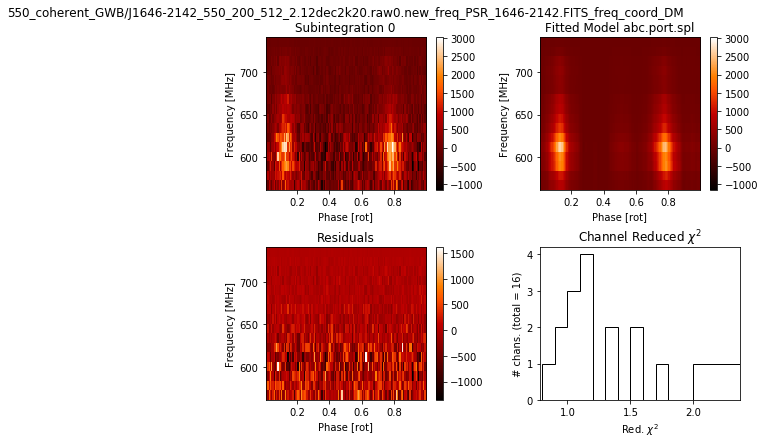


Reading data from 550_coherent_GWB/J1646-2142_550_200_512_2.20dec2k20.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.725938
        center freq. [MHz] = 649.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 16
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 2699.92 s
Reading model from J1646-2142_550MHz_splinefit.spl...
Fitting for TOA #1
--------------------------
550_coherent_GWB/J1646-2142_550_200_512_2.20dec2k20.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM
~0.0105 sec/TOA
Med. TOA error is 4.237 us

Reading data from 550_coherent_GWB/J1646-2142_550_200_512_2.20dec2k20.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.725938
        center 

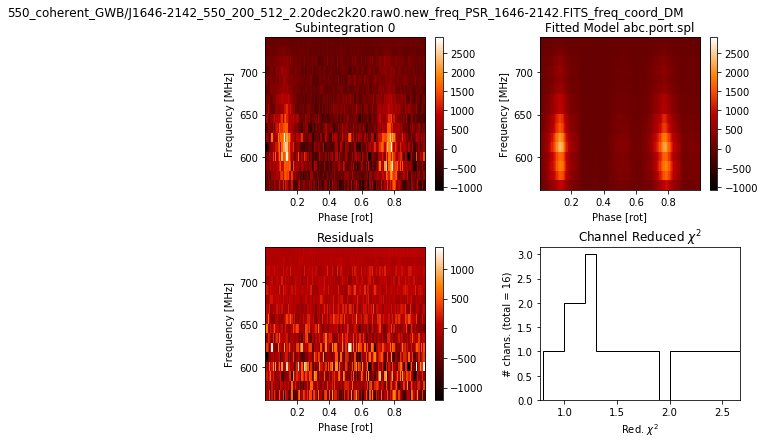


Reading data from 550_coherent_GWB/J1646-2142_550_200_512_2.4jan2k21.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.725938
        center freq. [MHz] = 649.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 16
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 1798.96 s
Reading model from J1646-2142_550MHz_splinefit.spl...
Fitting for TOA #1
--------------------------
550_coherent_GWB/J1646-2142_550_200_512_2.4jan2k21.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM
~0.0124 sec/TOA
Med. TOA error is 4.661 us

Reading data from 550_coherent_GWB/J1646-2142_550_200_512_2.4jan2k21.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.725938
        center fre

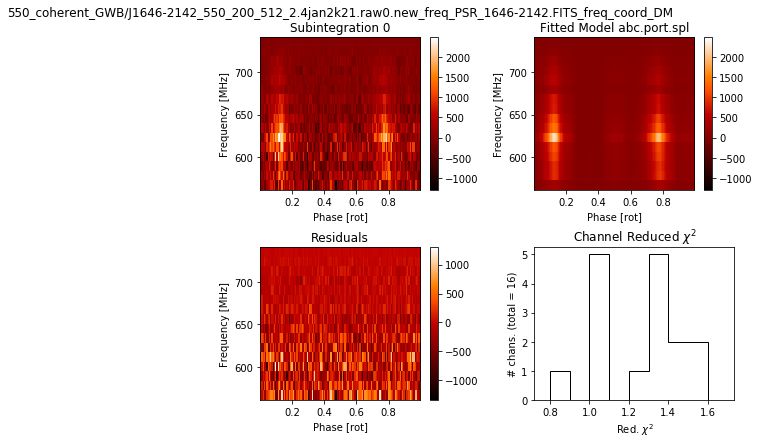


Reading data from 550_coherent_GWB/J1646-2142_550_200_512_2.9jan2k21.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.725938
        center freq. [MHz] = 649.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 16
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 1990.66 s
Reading model from J1646-2142_550MHz_splinefit.spl...
Fitting for TOA #1
--------------------------
550_coherent_GWB/J1646-2142_550_200_512_2.9jan2k21.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM
~0.0103 sec/TOA
Med. TOA error is 3.423 us

Reading data from 550_coherent_GWB/J1646-2142_550_200_512_2.9jan2k21.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.725938
        center fre

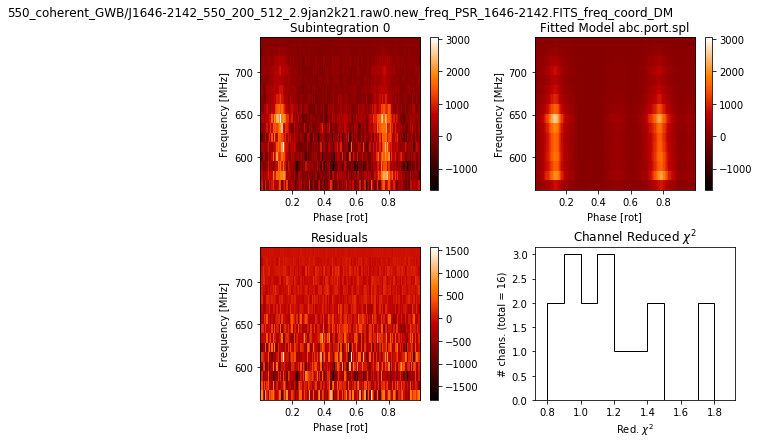


Reading data from 550_coherent_GWB/J1646-2142_550_200_512_2.13feb2k21.raw0.new_freq.128_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.725938
        center freq. [MHz] = 649.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 16
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 2176.45 s
Reading model from J1646-2142_550MHz_splinefit.spl...
Fitting for TOA #1
--------------------------
550_coherent_GWB/J1646-2142_550_200_512_2.13feb2k21.raw0.new_freq.128_PSR_1646-2142.FITS_freq_coord_DM
~0.0147 sec/TOA
Med. TOA error is 3.548 us

Reading data from 550_coherent_GWB/J1646-2142_550_200_512_2.13feb2k21.raw0.new_freq.128_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.725938
   

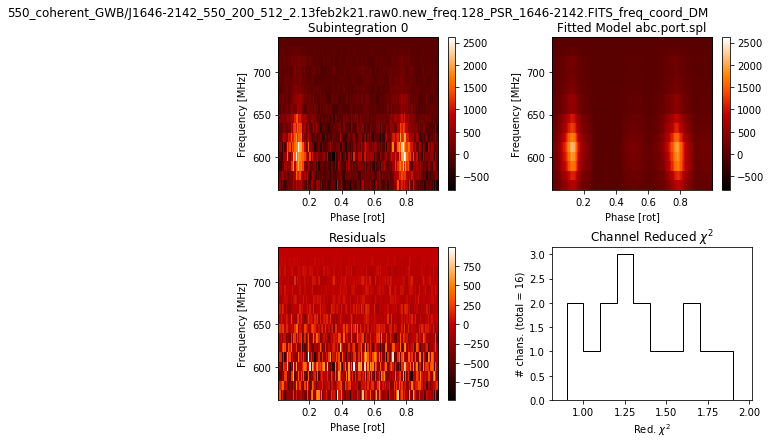

--------------------------
Total time: 0.37 sec, ~0.0288 sec/TOA


In [11]:
import pptoas as ppt
from pplib import write_TOAs
toaprogmeta = "J1646-2142_550MHz_coherent16.meta"
gt = ppt.GetTOAs(toaprogmeta, J1646_fit_modelfile)
gt.get_TOAs(bary=True, show_plot=True)
#gt.get_narrowband_TOAs()


In [12]:
# TOAs produced. Can see number of TOAs produced per epoch as well as median TOA error for
# each epoch.
#gt.show_fit(datafile=None, isub=0)  # datafile=None will just select the first datafile from the metafile
timfile = "25Dec2k21_WB_C_J1646-2142_550MHz_1eig.tim"
#timfile = "25Dec2k21_NB_C_J1646-2142_550MHz.tim"
write_TOAs(gt.TOA_list, SNR_cutoff=0.0, outfile=timfile, append=False)

# Writing of TOAs to tim file. Writes in TEMPO format. Can copy paste "freq MJD uncert"
# information into another tim file.

In [13]:
fil = open('25Dec2k21_WB_C_J1646-2142_550MHz_1eig.tim', 'r')
for line in fil:
  print line#.split()[2],  line.split()[3], line.split()[4], line.split()[5], line.split()[6], line.split()[7], line.split()[8]

550_coherent_GWB/J1646-2142_550_200_1024_2.29jan2k20.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM 649.15607463 58877.030069804617832   6.907  gmrt -pp_dm 29.7358244 -pp_dme 0.0043789 -be  -nchx 16 -tobs 3597.926 -f _ -gof 1.354 -snr 42.395 -fratio 1.322 -subint 0 -nch 16 -bw 180.468 -chbw 12.500 -fe  -nbin 128 -tmplt J1646-2142_550MHz_splinefit.spl

550_coherent_GWB/J1646-2142_550_200_1024_2.10jun2k20.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM 668.20440317 59010.658639397930656   2.003  gmrt -pp_dm 29.7298036 -pp_dme 0.0015326 -be  -nchx 16 -tobs 2698.445 -f _ -gof 1.437 -snr 136.870 -fratio 1.322 -subint 0 -nch 16 -bw 180.468 -chbw 12.500 -fe  -nbin 128 -tmplt J1646-2142_550MHz_splinefit.spl

550_coherent_GWB/J1646-2142_550_200_512_2.18jun2k20.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM 637.86697115 59018.611091455629159   6.353  gmrt -pp_dm 29.7324772 -pp_dme 0.0044003 -be  -nchx 16 -tobs 2699.919 -f _ -gof 1.214 -snr 43.909 -fratio 1.322 -subint 0 -nch 16 -bw 180.469 -chbw 